In [59]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bike.jpg to bike (1).jpg
User uploaded file "bike.jpg" with length 34795 bytes


In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [0]:
def disp(img) :
  plt.imshow(img, cmap = 'gray')

In [0]:
filename = "test.png"
img = cv2.imread(filename)

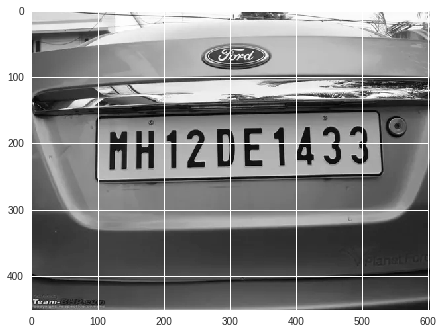

In [80]:
grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
disp(grey_img)

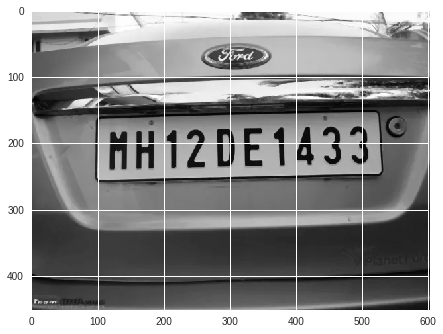

In [81]:
median_img = cv2.medianBlur(grey_img, 3)
disp(median_img)

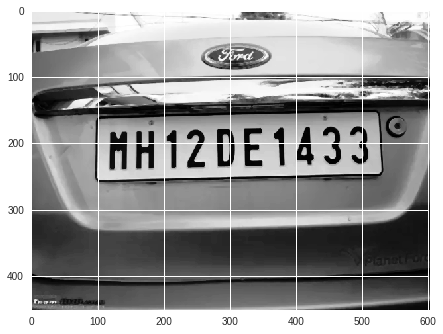

In [82]:
equ_img = cv2.equalizeHist(median_img)
disp(equ_img)

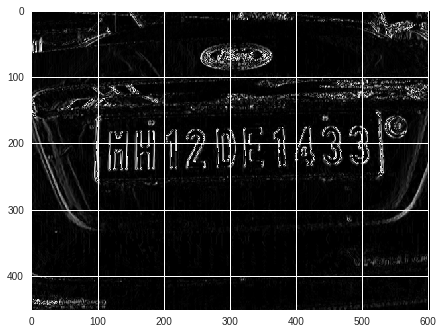

In [83]:
sobelx64f = cv2.Sobel(equ_img,cv2.CV_64F, 1, 0, ksize=3)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
disp(sobel_8u)

(452, 602)


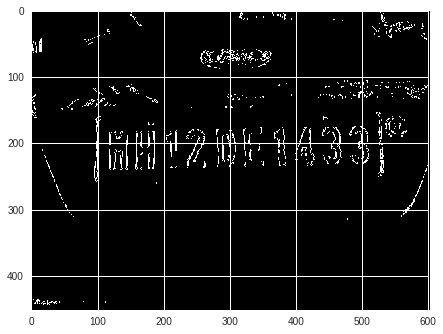

In [84]:
mu_grad = int(np.mean(sobel_8u))
print(sobel_8u.shape)
ret, thresh_img = cv2.threshold(sobel_8u, 127, 255, cv2.THRESH_BINARY)
disp(thresh_img)

In [151]:
Tmin = 5
Vxmax = 40
height = thresh_img.shape[0]
width = thresh_img.shape[1]

print(height, width)

452 602


(452,)
212.75462536040175
225.28616061948117
221.7472040076427
220.93322520616948
180.16032597538106
190.69147530585957
183.87865394058116
190.16060463606954
208.78622069095752
209.8420500052676
209.01485563601264
202.87653607277724
197.16481644489718
201.63491204427382
207.4170550141521
223.73435527069833
177.04411112474375
139.35109934582104
142.44612968707077
142.83161196724845
130.33554914872929
137.8015944081681
138.4509788832098
149.43067225270974
153.80252728642452
158.7375449075149
150.41060959682977
152.05925378676426
140.51531813504582
147.92781499617755
142.41170157553137
142.69185635273635
136.84076715495115
131.9004286122069
126.75685939400127
123.02550115078867
121.19902068242585
126.90539940998681
131.75701957962164
136.89469735261954
134.2287918900016
136.31189806366504
134.21688221870815
131.874784095151
129.69479151669512
124.47556654487123
126.11435059930069
126.73787279262659
136.44462540704612
137.39298936105544
140.89039945916582
138.01999927516556
138.22537311322

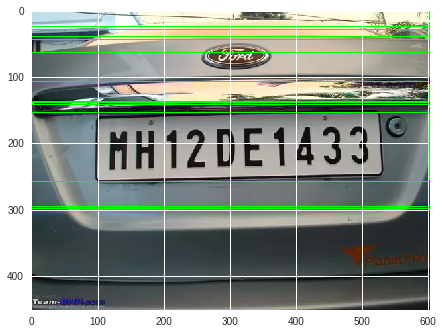

In [160]:
# first stage

# edge_pixel = np.array([np.nonzero(thresh_img[i])[0] for i in range(height)])

edge_pixel = []
for i in range(height) :
  edge_pixel.append([])
  for j in range(width) :
    if thresh_img[i][j] : 
      edge_pixel[i].append(j)
      
edge_pixel = np.array(edge_pixel)
print(edge_pixel.shape)

mean = height * [0]
variance = height * [0]

for i in range(len(edge_pixel)) :
   if len(edge_pixel[i]) > Tmin :
      mean[i] = np.mean(edge_pixel[i])
      variance[i] = np.std(edge_pixel[i])
      
bands = []
band_top = 0
band_bottom = 0
in_band = False

for i in range(height) :
  if variance[i] > Vxmax :
    if not in_band :
      band_top = i
      in_band = True
    band_bottom = i
  elif in_band :
    bands.append([0, band_top, width - 1, band_bottom])
    in_band = False

print(bands)    

bands_img = img.copy()

for band in bands :
  bands_img = cv2.rectangle(bands_img, (band[0], band[1]), (band[2], band[3]), (0, 255, 0), 1)
disp(bands_img)

152.09201893006164
162.4908065775483
208.85933597094055
262.3039209367171
150.75956851888375
55.038897852488006
227.89395411240653
50.37044989100477
124.23408013370029
260.2574446581692
239.6722878339412
239.73179458163938
246.0750224355708
191.93350989918935
[[175, 0, 589, 13], [325, 16, 690, 23], [192, 27, 708, 36], [-80, 38, 730, 43], [7, 57, 423, 62], [441, 106, 575, 107], [-108, 110, 700, 136], [39, 138, 140, 138], [-40, 141, 345, 146], [2, 153, 637, 155], [-90, 158, 685, 255], [12, 257, 492, 257], [152, 293, 646, 295], [289, 298, 687, 301]]


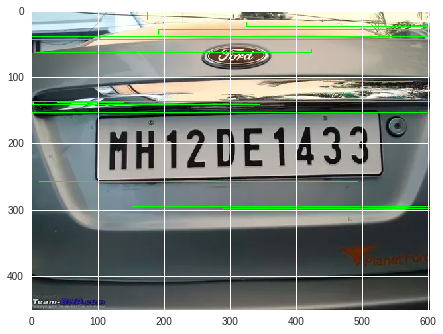

In [154]:
# second stage

for i, band in enumerate(bands) :
  mean_roi = mean[band[1] : band[3] + 1]
  var_roi = variance[band[1] : band[3] + 1]
  mu_min = min(mean_roi)
  mu_max = max(mean_roi)
  var_max = max(var_roi)
  
  print(var_max)
  
  band[0] = int(np.floor(mu_min - var_max))
  band[2] = int(np.ceil(mu_max + var_max))
  
  bands[i] = band
  
print(bands)

bands_img = img.copy()

for band in bands :
  bands_img = cv2.rectangle(bands_img, (band[0], band[1]), (band[2], band[3]), (0, 255, 0), 1)
disp(bands_img)  